# **特征选择 feature_selection**

* 特征提取 feature extraction   
    从文字，图像，声音等其他非结构化数据中提取新信息作为特征。比如说，从淘宝宝贝的名称中提取出产品类别，产品颜色，是否是网红产品等等。
* 特征创造 feature creation   
    把现有特征进行组合，或互相计算，得到新的特征。比如说，我们有一列特征是速度，一列特征是距离，我们就可以通过让两列相除，创造新的特征：通过距离所花的时间。
* 特征选择 (feature selection)   
    **从所有的特征中，选择出有意义，对模型有帮助的特征，以避免必须将所有特征都导入模型去训练的情况。**  

以上即是特征工程   
> 在做特征选择之前,有一件非常重要的事: **跟数据提供者开会**   
> 一定要与理解业务和数据含义的人交流,技术能让模型起飞,前提是你和业务人员一样的理解数据,所以特征选择的第一步,是根据常识来选择特征

**特征工程的第一步:理解业务**  

当然,在真正的数据应用领域,比如金融,医疗,电商,数据不可能像泰坦尼克号数据特征这样少,这样明显,如果遇见极端情况,无法依赖对业务的理解来选择特征,有4种方法可以用来选择特征:过滤法,嵌入发,包装法,降维算法

In [3]:
import pandas as pd

data = pd.read_csv(r"C:\workspace\Data\digit recognizor.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [5]:
x.shape

(42000, 784)

In [ ]:
"""
此数据量相当夸张,如果使用支持向量机和神经网络,很可能会直接跑不出来,使用KNN跑一次大概需要半小时
用这个数据,更能够体现特征工程的重要性
"""

## **Filter过滤法**

过滤方法通常用作预处理步骤，特征选择完全独立于任何机器学习算法。它是**根据各种统计检验中的分数以及相关性的各项指标**来选择特征。

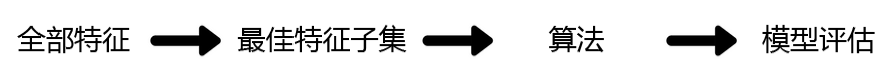

### 1.方差过滤 VarianceThreshold   

这是通过特征本身的方差来筛选特征的类。比如一个特征本身的方差很小，就表示样本在这个特征上基本没有差异，可能特征中的大多数值都一样，甚至整个特征的取值都相同，那这个特征对于样本区分没有什么作用。**所以无论接下来的特征工程要做什么，都要优先消除方差为0的特征。** VarianceThreshold有重要参数threshold，表示方差的阈值，表示舍弃所有方差小于threshold的特征，不填默认为0，即删除所有的记录都相同的特征。（方差越小越稳定）


In [6]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()  # 实例化一个对象，也就是默认删除方差是0的特征
x_var0=selector.fit_transform(x)# 获取删除不合格特征后的新特征矩阵
x_var0.shape# 目前只剩下708个特征,通过本次筛选，已经把方差为0的特征列全部去掉

(42000, 708)

In [7]:
pd.DataFrame(x_var0).head()

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


可以看见，我们已经删除了方差为0的特征，但是依然剩下了708多个特征，明显还需要进一步的特征选择。然而，如果我们知道我们需要多少个特征，方差也可以帮助我们将特征选择一步到位。比如说，我们希望留下一半的特征，那可以设定一个让特征总数减半的方阈值，只要找到特征方差的中位数，再将这个中位数作为参数threshold的值输入就好了：


In [11]:
import numpy as np

x.var().values[:50]  # 读取每一列的方差

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22760590e-01, 2.64689018e+00, 1.11085714e+00, 1.92857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.09523810e-03, 5.41186213e-02, 1.28065733e+00, 5.33793150e+00,
       9.74592647e+00, 1.06219147e+01, 2.49289953e+01, 3.37671294e+01,
       3.59425660e+01, 3.49309575e+01, 3.62943342e+01, 3.27911079e+01,
       3.04237672e+01, 2.95547817e+01, 2.00568398e+01, 1.19545659e+01,
       8.60419724e+00, 2.55465685e+00])

In [12]:
np.median(x.var().values)  # 方差中位数

1352.2867031797243

In [13]:
x_fsvar=VarianceThreshold(np.median(x.var().values)).fit_transform(x)  #把中位数作为参数，算法会把特征的方差小于我们设定的阈值的特征全部删除
x_fsvar.shape

(42000, 392)

当特征是二分类时，特征的取值就是伯努利随机变量，这些变量的方差可以计算为：   
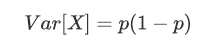  
其中X是特征矩阵，p是二分类特征中的一类在这个特征中所占的概率。

In [14]:

#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(x)
X_bvar.shape
# 也就是计算每个特征中，如果某一个分类占比达到80%以上，就删除这一个特征


(42000, 685)

### 1.1 方差过滤对模型的影响

我们这样做了以后，对模型效果会有怎样的影响呢？了KNN和随机森林分别在方差过滤前和方差过滤后运行的效果和运行时间的对比。KNN是K近邻算法中的分类算法，其原理非常简单，是利用每个样本到其他样本点的距离来判断每个样本点的相似度，然后对样本进行分类。KNN必须遍历每个特征和每个样本，因而特征越多，KNN的计算也就会越缓慢


In [15]:
#KNN vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np
 
# 获取数据，方差过滤前的数据进行训练
x=data.iloc[:,1:]
x.shape
# 一共42000行数据，784个特征
 
# 获取标签
# y是标签
y=data.iloc[:,0]
y.shape
# 进行特征选择，以数据集方差的中位数作为阈值
x_fsvar=VarianceThreshold(np.median(x.var().values)).fit_transform(x)
x_fsvar.shape
# 作为方差过滤后的数据进行训练计算
# 经过中位数阈值的特征选择之后，剩下392个可选的特征


(42000, 392)

我们从模块neighbors导入KNeighborsClassfier缩写为KNN，导入随机森林缩写为RFC，然后导入交叉验证模块和numpy。其中未过滤的数据是X和y，使用中位数过滤后的数据是X_fsvar。

In [ ]:
#======【TIME WARNING：35mins】======#
cross_val_score(KNN(),X,y,cv=5).mean()  

#======【TIME WARNING：4 hours】======#

# python中的魔法命令，会返回这一个单元所有代码运行完毕使用的时间
#为了计算所需的时间，需要将这个cell中的代码运行很多次（通常是7次）后求平均值，因此运行%%timeit的时间会
#远远超过cell中的代码单独运行的时间
%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()  

In [ ]:
cross_val_score(KNN(),X,y,cv=5).mean()  
>>> 0.9658569........

In [ ]:
%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()  
>>> 33min 58s .......

### 1.2 KNN方差过滤后

In [ ]:
cross_val_score(KNN(),x_fsvar,y,cv=5).mean()
>>> 0.965999....

In [ ]:
可以看出,对于KNN,过滤后的效果10分明显:准确率稍有提升,但平均运行时间减少了10分钟,特征选择后算法效率上升了1/3,那随机森林又如何?

### 1.3 随机森林方差过滤前

In [ ]:
cross_val_score(RFC(n_estimators=10,random_state=0),x,y,cv=10).mean()
>>>0.938000386.....

In [ ]:
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0),x,y,cv=10).mean()
>>> 11.5s ....

### 1.4 随机森林方差过滤后

In [ ]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fsvar,y,cv=10).mean()
>>> 0.93880....

In [ ]:
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0),x,y,cv=10).mean()
>>> 11.1s ....

首先可以观察到的是，随机森林的准确率略逊于KNN，但运行时间却连KNN的1%都不到，只需要十几秒钟。其次，方差过滤后，随机森林的准确率也微弱上升，但运行时间却几乎是没什么变化，依然是11秒钟。

**为什么随机森林运行如此之快？为什么方差过滤对随机森林没很大的有影响？**  
这是由于两种算法的原理中涉及到的计算量不同。最近邻算法KNN，单棵决策树，支持向量机SVM，神经网络，回归算法，都需要遍历特征或升维来进行运算，所以他们本身的运算量就很大，需要的时间就很长，因此方差过滤这样的特征选择对他们来说就尤为重要。**但对于不需要遍历特征的算法，比如随机森林，它随机选取特征进行分枝，本身运算就非常快速，因此特征选择对它来说效果平平。** 这其实很容易理解，**无论过滤法如何降低特征的数量，随机森林也只会选取固定数量的特征来建模；** 而最近邻算法就不同了，特征越少，距离计算的维度就越少，模型明显会随着特征的减少变得轻量。因此，**过滤法的主要对象**是：**需要遍历特征或升维的算法们**，而**过滤法的主要目的是：在维持算法表现的前提下，帮助算法们降低计算成本。**


---
**思考:过滤法对随机森林无效，却对树模型有效？**

从算法原理上来说，传统决策树需要遍历所有特征，计算不纯度后进行分枝，而随机森林却是随机选择特征进行计算和分枝，因此随机森林的运算更快，过滤法对随机森林无用，对决策树却有用,

在sklearn中，决策树和随机森林都是随机选择特征进行分枝（不记得的小伙伴可以去复习第一章：决策树，参数random_state），但决策树在建模过程中随机抽取的特征数目却远远超过随机森林当中每棵树随机抽取的特征数目（比如说对于这个780维的数据，随机森林每棵树只会抽取10~20个特征，而决策树可能会抽取300~400个特征），因此，过滤法对随机森林无用，却对决策树有用

也因此，在sklearn中，随机森林中的每棵树都比单独的一棵决策树简单得多，高维数据下的随机森林的计算比决策树快很多。

---

对受影响的算法来说，我们可以将方差过滤的影响总结如下：   

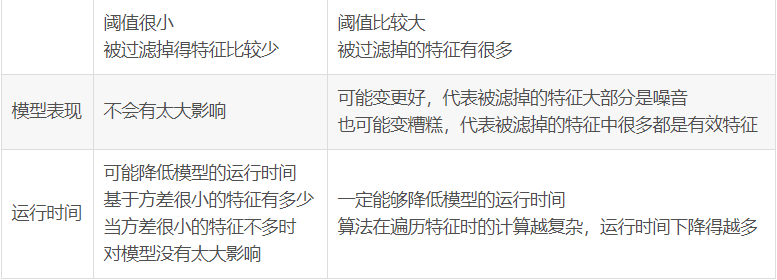

在我们的对比当中，我们使用的方差阈值是特征方差的中位数，因此属于阈值比较大，过滤掉的特征比较多的情况。我们可以观察到，无论是KNN还是随机森林，在过滤掉一半特征之后，模型的精确度都上升了。这说明被我们过滤掉的特征在当前随机模式(random_state = 0)下大部分是噪音。那我们就可以保留这个去掉了一半特征的数据，来为之后的特征选择做准备。当然，如果过滤之后模型的效果反而变差了，我们就可以认为，被我们过滤掉的特征中有很多都有有效特征，那我们就放弃过滤，使用其他手段来进行特征选择。


---

思考: 虽然随机森林算的快,但KNN的效果比随机森林更好?    
    调整一下n_estimator试试看,随机森林很强大

### **选取超参数threshold**  

**我们怎样知道，方差过滤掉的到底时噪音还是有效特征呢？过滤后模型到底会变好还是会变坏呢？**  
答案是：每个数据集不一样，只能自己去尝试。这里的方差阈值，其实相当于是一个超参数，要选定最优的超参数，我们可以画学习曲线，找模型效果最好的点。**但现实中，我们往往不会这样去做，因为这样会耗费大量的时间。我们只会使用阈值为0或者阈值很小的方差过滤，来为我们优先消除一些明显用不到的特征，然后我们会选择更优的特征选择方法继续削减特征数量。**


### 2.相关性过滤

方差挑选完毕之后，我们就要考虑下一个问题：相关性了。我们希望选出与标签相关且有意义的特征，因为这样的特征能够为我们提供大量信息。如果特征与标签无关，那只会白白浪费我们的计算内存，可能还会给模型带来噪音。在sklearn当中，我们有三种常用的方法来评判特征与标签之间的相关性：卡方，F检验，互信息。


### 2.1 卡方过滤

卡方过滤是专门针对离散型标签（即分类问题）的相关性过滤。卡方检验类feature_selection.chi2计算每个非负特征和标签之间的卡方统计量，并依照卡方统计量由高到低为特征排名。再结合feature_selection.SelectKBest这个可以输入”评分标准“来选出前K个分数最高的特征的类，我们可以借此除去最可能独立于标签，与我们分类目的无关的特征

另外，如果卡方检验检测到某个特征中所有的值都相同，会提示我们使用方差先进行方差过滤。并且，刚才我们已经验证过，当我们使用方差过滤筛选掉一半的特征后，模型的表现时提升的。因此在这里，我们使用threshold=中位数时完成的方差过滤的数据来做卡方检验（如果方差过滤后模型的表现反而降低了，那我们就不会使用方差过滤后的数据，而是使用原数据）：


In [21]:
# 使用手写数字数据集
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection  import cross_val_score
from sklearn.feature_selection import SelectKBest # 选取分数最高的特征的
from sklearn.feature_selection import chi2 # 卡方检验的类
from sklearn.feature_selection import VarianceThreshold
 
# 卡方过滤
# 特征选择
import pandas as pd
data=pd.read_csv(r"C:\workspace\Data\digit recognizor.csv")
data.shape

(42000, 785)

In [22]:
import numpy as np
x=data.iloc[:,1:]
y=data.iloc[:,0]
# 进行特征选择，以数据集方差的中位数作为阈值
x_fsvar=VarianceThreshold(np.median(x.var().values)).fit_transform(x)
x_fsvar.shape

(42000, 392)

In [6]:
# 第一个参数表示用什么分布检验，比如卡方分布，F检验，第二个参数标示选取前多少个复合条件的特征
# k标示选取前k个卡方分布最好的特征
# 第二个参数也就是k的取值，也就是选取多少个最优的特征
x_fschi=SelectKBest(chi2,k=300).fit_transform(x_fsvar,y)
x_fschi.shape

(42000, 300)

In [7]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=10).mean()

0.9365

可以看出，模型的效果降低了，这说明我们在设定k=300的时候删除了与模型相关且有效的特征，我们的K值设置得太小，要么我们需要调整K值，要么我们必须放弃相关性过滤。当然，如果模型的表现提升，则说明我们的相关性过滤是有效的，是过滤掉了模型的噪音的，这时候我们就保留相关性过滤的结果。

**选取超参数K**   
那如何设置一个最佳的K值呢？在现实数据中，数据量很大，模型很复杂的时候，我们也许不能先去跑一遍模型看看效果，而是希望最开始就能够选择一个最优的超参数k。那第一个方法，就是我们之前提过的学习曲线：

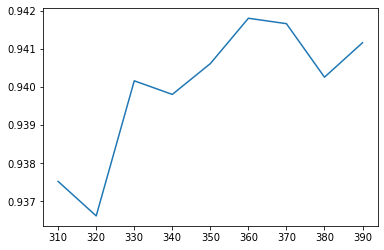

In [10]:
# 对于k值的选取，哦们使用学习曲线进行选取
import matplotlib.pyplot as plt
scores=[]
for i in range(390,300,-10):
    x_fschi=SelectKBest(chi2,k=i).fit_transform(x_fsvar,y)
    score=cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=10).mean()
    scores.append(score)
plt.plot(range(390,300,-10),scores)
plt.show()


通过这条曲线，我们可以观察到，随着K值的不断增加，模型的表现不断上升，这说明，K越大越好，数据中所有的特征都是与标签相关的。但是运行这条曲线的时间同样也是非常地长，接下来我们就来介绍一种更好的选择k的方法：看p值选择k。

卡方检验的本质是推测两组数据之间的差异，其检验的原假设是”两组数据是相互独立的”。卡方检验返回卡方值和P值两个统计量，其中卡方值很难界定有效的范围，而p值，我们一般使用0.01或0.05作为显著性水平，即p值判断的边界，具体我们可以这样来看：

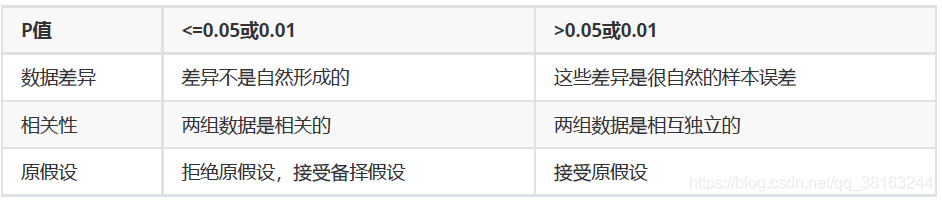

**从特征工程的角度，我们希望选取卡方值很大，p值小于0.05的特征，即和标签是相关联的特征。** 而调用SelectKBest之前，我们可以直接从chi2实例化后的模型中获得各个特征所对应的卡方值和P值。

In [18]:
# 第二种方法选择k
# 看p值选择k值
# 返回第一个值是卡方值，第二个值是p值
chivalue,pvalues_chi=chi2(x_fsvar,y)
pvalues_chi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
# 我们发现所有特征的p值都小于0.05，所以所有的特征都是和标签相关的
# 所以我们拒绝原假设，接受备择假设
# 既然这些特征都是和标签相关，那么我们砍掉的特征越多，模型预测也就越不准确
# 也就是说这些特征对标签有贡献，对模型有影响
# 所以说我们拒绝原假设，也就是消除p值大于0.05的那些特征
 # 使用bool索引查看我们想要删除的特征的个数
(pvalues_chi>0.05).sum()
# 结果是0，因为所有的特征对应的p值都是小于0.05的

0

In [20]:
 
# 在用所有特征的总数-要删除的特征的数量，就是k值，也就是需要的特征个数
k=chivalue.shape[0]-(pvalues_chi>0.05).sum()
k

392

可以观察到，所有特征的p值都是0，这说明对于digit recognizor这个数据集来说，方差验证已经把所有和标签无关的特征都剔除了，或这个数据集本身就不含与标签无关的特征。在这种情况下，舍弃任何一个特征，都会舍弃对模型有用的信息，而使模型表现下降，因此在我们对计算速度感到满意时，我们不需要使用相关性过滤来过滤我们的数据。如果我们认为运算速度太缓慢，那我们可以酌情删除一些特征，但前提是，我们必须牺牲模型的表现。接下来，我们试试看用其他的相关性过滤方法验证一下我们在这个数据集上的结论。


### 2.2 F检验

F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也可以做分类，因此包含feature_selection.f_classif（F检验分类）和feature_selection.f_regression（F检验回归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据。

和卡方检验一样，这两个类需要和类SelectKBest连用，并且我们也可以直接通过输出的统计量来判断我们到底要设置一个什么样的K。需要注意的是，F检验在数据服从正态分布时效果会非常稳定，因此如果使用F检验过滤，我们会先将数据转换成服从正态分布的方式。

F检验的本质是寻找两组数据之间的线性关系，其原假设是”数据不存在显著的线性关系“。它返回F值和p值两个统计量。和卡方过滤一样，**我们希望选取p值小于0.05或0.01的特征，这些特征与标签时显著线性相关的**，而p值大于0.05或0.01的特征则被我们认为是和标签没有显著线性关系的特征，应该被删除。以F检验的分类为例，我们继续在数字数据集上来进行特征选择：


In [23]:
# 现在使用F检验进行过滤
from sklearn.feature_selection import f_classif
# 返回F值和p值两个统计量
F,p_value=f_classif(x_fsvar,y)
p_value

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [24]:
# 求k值
k=F.shape[0]-(p_value>0.05).sum()
k

392

In [ ]:
#X_fsF = SelectKBest(f_classif, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsF,y,cv=5).mean()

得到的结论和我们用卡方过滤得到的结论一模一样：没有任何特征的p值大于0.01，所有的特征都是和标签相关的，因此我们不需要相关性过滤。

### 2.3互信息法

互信息法是用来捕捉每个特征与标签之间的任意关系（包括线性和非线性关系）的过滤方法。和F检验相似，它既可以做回归也可以做分类，并且包含两个类feature_selection.mutual_info_classif（互信息分类）和feature_selection.mutual_info_regression（互信息回归）。这两个类的用法和参数都和F检验一模一样，不过互信息法比F检验更加强大，F检验只能够找出线性关系，而互信息法可以找出任意关系。

互信息法不返回p值或F值类似的统计量，它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间取值，为0则表示两个变量独立，为1则表示两个变量完全相关。以互信息分类为例的代码如下：


In [26]:
# 使用互信息法进行过滤
from sklearn.feature_selection import mutual_info_classif as MIC
# 返回的结果是两列数据互信息量的估计，也就是两列信息相关性的估计
result=MIC(x_fsvar,y)
result
# 一共有350个数据，也就是说明把每一个特征和标签y之间的互信息都计算出来，判断
# 每一个特征和标签之间的相关性
 

array([0.06576654, 0.08864472, 0.09898476, 0.12098034, 0.11750337,
       0.11036748, 0.08701953, 0.05136248, 0.07166478, 0.0898152 ,
       0.1171905 , 0.14324797, 0.15675255, 0.16837974, 0.15717899,
       0.12572025, 0.09364078, 0.06380713, 0.04412869, 0.02107945,
       0.06630943, 0.09824551, 0.12857334, 0.14808569, 0.1759405 ,
       0.20533822, 0.22931375, 0.22653974, 0.21918644, 0.18633171,
       0.14003932, 0.09755263, 0.07736035, 0.05502264, 0.04371544,
       0.03656433, 0.05910801, 0.07606754, 0.1121291 , 0.12125299,
       0.13215719, 0.15349053, 0.16335813, 0.18383126, 0.18230759,
       0.17243478, 0.15479704, 0.13107037, 0.10952538, 0.09572819,
       0.08556987, 0.06490203, 0.06984431, 0.04943456, 0.06415981,
       0.07728194, 0.0899184 , 0.09384653, 0.10773031, 0.11048432,
       0.10729434, 0.11215599, 0.11886293, 0.12139425, 0.10668753,
       0.10907822, 0.11622109, 0.11002742, 0.09643662, 0.08032686,
       0.07045743, 0.04441063, 0.05725265, 0.06488894, 0.07612

In [27]:
k=result.shape[0]-(result <= 0).sum()
k

392

所有特征的互信息量估计都大于0，因此所有特征都与标签相关。

当然了，无论是F检验还是互信息法，大家也都可以使用学习曲线，只是使用统计量的方法会更加高效。当统计量判断已经没有特征可以删除时，无论用学习曲线如何跑，删除特征都只会降低模型的表现。当然了，如果数据量太庞大，模型太复杂，我们还是可以牺牲模型表现来提升模型速度，一切都看大家的具体需求。


### **过滤法总结**

到这里我们学习了常用的基于过滤法的特征选择，包括方差过滤，基于卡方，F检验和互信息的相关性过滤，讲解了各个过滤的原理和面临的问题，以及怎样调这些过滤类的超参数。通常来说，我会建议，**先使用方差过滤，然后使用互信息法来捕捉相关性**，不过了解各种各样的过滤方式也是必要的。

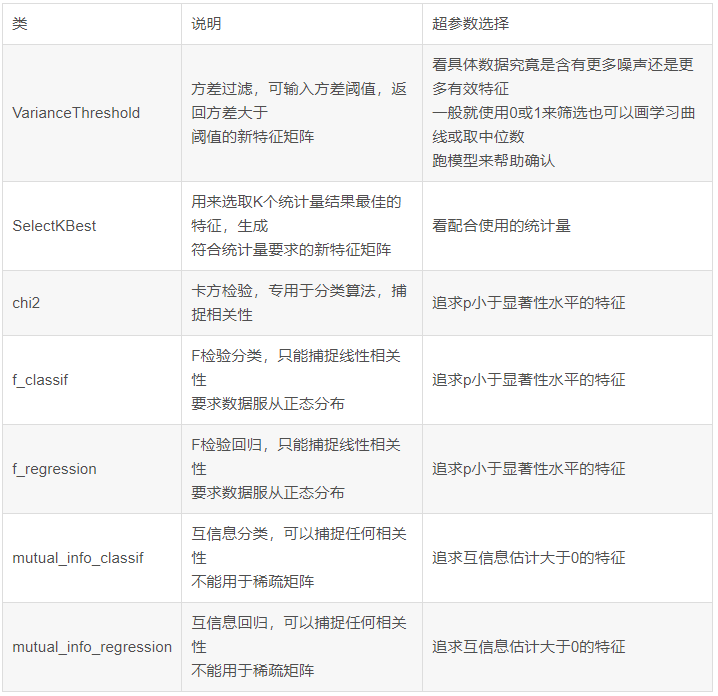